In [791]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.inspection import permutation_importance

In [736]:
df = pd.read_csv('bank_customers.csv')
df.head()

,Unnamed: 0,customer_id,churned,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,months_inactive,contacts_count,Avg_Open_To_Buy,Total_Trans_Amt,transactions_count,utilization_ratio
0,0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,11914.0,1144,42,0.061
1,1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,7392.0,1291,33,0.105
2,2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,1887,20,0.000
3,3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,796.0,1171,20,0.760
4,4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,816,28,0.000


In [737]:
df.shape

(10127, 18)

In [738]:
df.columns

Index(['Unnamed: 0', 'customer_id', 'churned', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'months_inactive', 'contacts_count',
       'Avg_Open_To_Buy', 'Total_Trans_Amt', 'transactions_count',
       'utilization_ratio'],
      dtype='object')

In [739]:
df.isnull().sum()

Unnamed: 0                  0
customer_id                 0
churned                     0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
months_inactive             0
contacts_count              0
Avg_Open_To_Buy             0
Total_Trans_Amt             0
transactions_count          0
utilization_ratio           0
dtype: int64

In [740]:
df.isna().sum()

Unnamed: 0                  0
customer_id                 0
churned                     0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
months_inactive             0
contacts_count              0
Avg_Open_To_Buy             0
Total_Trans_Amt             0
transactions_count          0
utilization_ratio           0
dtype: int64

In [741]:
df.duplicated().sum()

0

In [742]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                10127 non-null  int64  
 1   customer_id               10127 non-null  int64  
 2   churned                   10127 non-null  object 
 3   Customer_Age              10127 non-null  int64  
 4   Gender                    10127 non-null  object 
 5   Dependent_count           10127 non-null  int64  
 6   Education_Level           10127 non-null  object 
 7   Marital_Status            10127 non-null  object 
 8   Income_Category           10127 non-null  object 
 9   Card_Category             10127 non-null  object 
 10  Months_on_book            10127 non-null  int64  
 11  Total_Relationship_Count  10127 non-null  int64  
 12  months_inactive           10127 non-null  int64  
 13  contacts_count            10127 non-null  int64  
 14  Avg_Op

In [743]:
df.drop(['Unnamed: 0', 'customer_id'], axis=1, inplace=True)

In [744]:
df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,months_inactive,contacts_count,Avg_Open_To_Buy,Total_Trans_Amt,transactions_count,utilization_ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,7469.139637,4404.086304,64.858695,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9090.685324,3397.129254,23.472570,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,3.000000,510.000000,10.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,1324.500000,2155.500000,45.000000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,3474.000000,3899.000000,67.000000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,9859.000000,4741.000000,81.000000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,18484.000000,139.000000,0.999000


In [745]:
df.head(10)

,churned,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,months_inactive,contacts_count,Avg_Open_To_Buy,Total_Trans_Amt,transactions_count,utilization_ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,11914.0,1144,42,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,7392.0,1291,33,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,1887,20,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,796.0,1171,20,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,816,28,0.000
5,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,3,1,2,2763.0,1088,24,0.311
6,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,6,1,3,32252.0,1330,31,0.066
7,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,2,2,2,27685.0,1538,36,0.048
8,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,5,2,0,19835.0,1350,24,0.113
9,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,6,3,3,9979.0,1441,32,0.144


In [746]:
# Transpose

df = df.sort_values(by='utilization_ratio', ascending=False)
df_transposed = df.transpose()
df_transposed.head(16)

,4443,7649,1452,7955,1999,6386,236,4975,2506,5439,...,8442,3039,8444,1186,3623,6968,1179,1176,8450,7175
churned,Attrited Customer,Attrited Customer,Existing Customer,Attrited Customer,Attrited Customer,Existing Customer,Attrited Customer,Attrited Customer,Existing Customer,Existing Customer,...,Attrited Customer,Existing Customer,Existing Customer,Existing Customer,Existing Customer,Attrited Customer,Existing Customer,Existing Customer,Attrited Customer,Attrited Customer
Customer_Age,38,59,57,54,26,39,52,45,50,51,...,55,48,50,64,50,46,48,34,32,45
Gender,F,F,M,F,F,F,M,F,M,F,...,F,M,F,F,F,F,F,M,F,M
Dependent_count,3,2,3,2,0,3,1,3,2,3,...,2,3,2,1,2,1,2,2,0,3
Education_Level,Uneducated,Uneducated,Uneducated,Unknown,Post-Graduate,Post-Graduate,Uneducated,College,Uneducated,Graduate,...,College,Uneducated,Graduate,High School,Unknown,High School,Uneducated,College,Unknown,Graduate
Marital_Status,Single,Divorced,Married,Married,Single,Married,Married,Married,Single,Single,...,Single,Single,Married,Married,Married,Married,Married,Married,Married,Single
Income_Category,$40K - $60K,Less than $40K,$80K - $120K,Unknown,Less than $40K,Less than $40K,$80K - $120K,Less than $40K,Less than $40K,Unknown,...,Unknown,$120K +,Less than $40K,$40K - $60K,Unknown,Less than $40K,$40K - $60K,$80K - $120K,Less than $40K,$80K - $120K
Card_Category,Blue,Blue,Blue,Blue,Blue,Blue,Blue,Blue,Blue,Blue,...,Blue,Blue,Blue,Blue,Blue,Blue,Blue,Blue,Blue,Blue
Months_on_book,30,36,38,49,15,19,36,36,40,45,...,49,38,36,56,31,42,36,22,36,39
Total_Relationship_Count,3,3,5,2,3,5,2,4,4,4,...,1,4,2,4,4,5,3,4,5,1


In [747]:
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(include='object').columns
len(num_cols), len(cat_cols)

(10, 6)

In [748]:
churned_df = df[df['churned'] == 'Attrited Customer']
print(churned_df.shape)
churned_df.head()

(1627, 16)


,churned,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,months_inactive,contacts_count,Avg_Open_To_Buy,Total_Trans_Amt,transactions_count,utilization_ratio
4443,Attrited Customer,38,F,3,Uneducated,Single,$40K - $60K,Blue,30,3,2,3,3.0,1460,32,0.999
7649,Attrited Customer,59,F,2,Uneducated,Divorced,Less than $40K,Blue,36,3,3,3,10.0,2462,40,0.995
7955,Attrited Customer,54,F,2,Unknown,Married,Unknown,Blue,49,2,4,3,14.0,2921,44,0.992
1999,Attrited Customer,26,F,0,Post-Graduate,Single,Less than $40K,Blue,15,3,2,3,14.0,1134,26,0.990
236,Attrited Customer,52,M,1,Uneducated,Married,$80K - $120K,Blue,36,2,3,3,24.0,829,17,0.987


In [749]:
# Replacing Unkowns with the mode

churned_df['Education_Level'].replace("Unknown", "Graduate", inplace=True)
churned_df['Income_Category'].replace("Unknown", "Less than $40K", inplace=True)
churned_df['Marital_Status'].replace("Unknown", "Married", inplace=True)

C:\Users\D E L L\AppData\Local\Temp\ipykernel_15716\1179860120.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churned_df['Education_Level'].replace("Unknown", "Graduate", inplace=True)
C:\Users\D E L L\AppData\Local\Temp\ipykernel_15716\1179860120.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churned_df['Income_Category'].replace("Unknown", "Less than $40K", inplace=True)
C:\Users\D E L L\AppData\Local\Temp\ipykernel_15716\1179860120.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

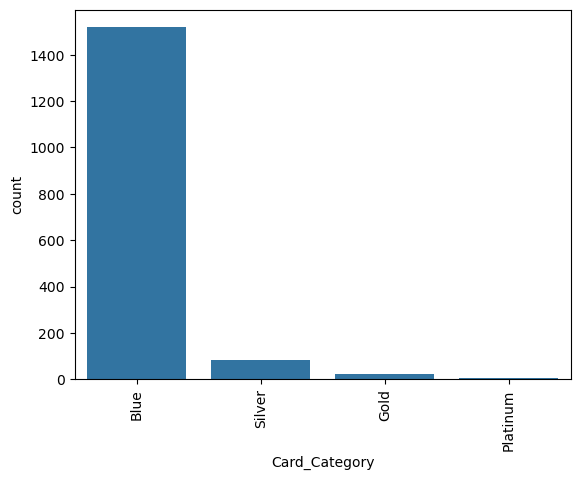

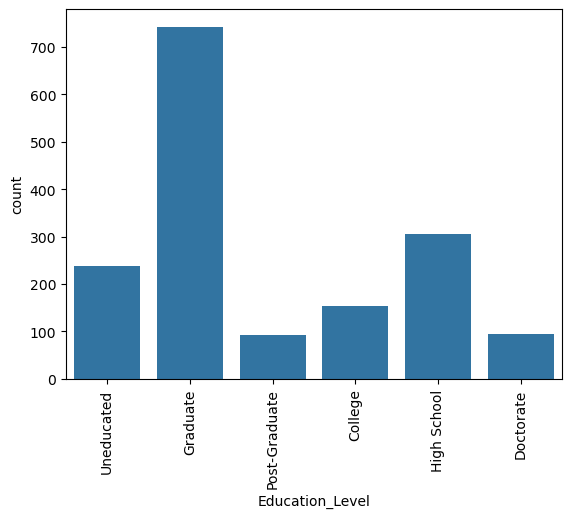

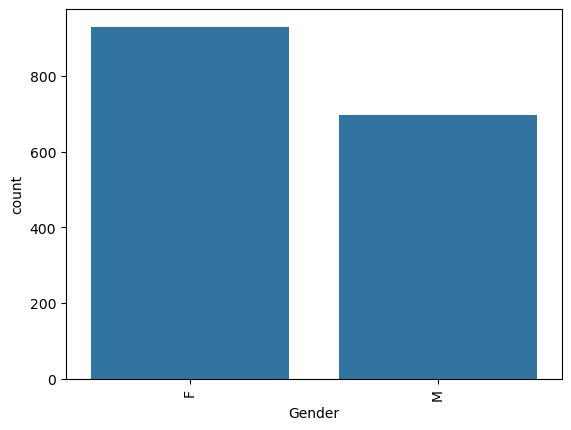

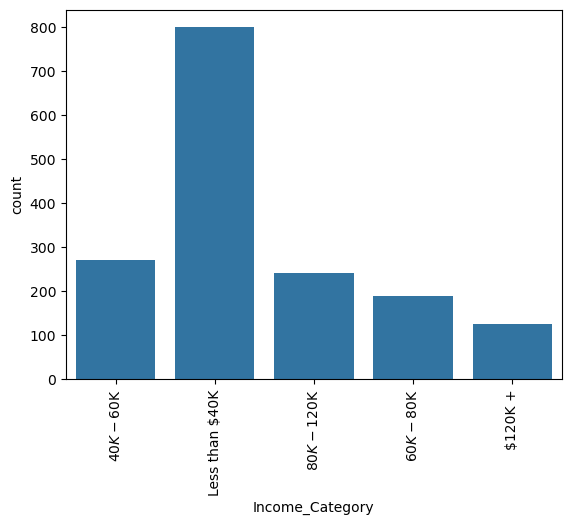

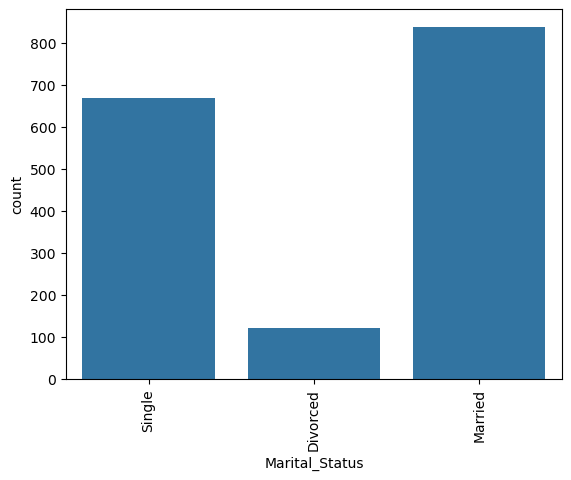

In [750]:
"""
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.flatten()

for i, feature in enumerate(cat_cols.difference(['churned', 'Marital_Status'])):
    plt.xticks(rotation=90)
    sns.countplot(data=churned_df, x=feature, ax=axes[i])
    axes[i].set_xticks(ticks=churned_df[feature].unique())
    

plt.tight_layout()
plt.show() 

plt.figure(figsize=(10, 5))
sns.countplot(data=churned_df, x='Marital_Status')
plt.show()
"""

churned_cats = cat_cols.difference(['churned'])

for feature in churned_df[churned_cats].columns:
    sns.countplot(data=churned_df, x=feature)
    plt.xticks(rotation=90)
    plt.show()

In [751]:
df[num_cols].sample(2)

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,months_inactive,contacts_count,Avg_Open_To_Buy,Total_Trans_Amt,transactions_count,utilization_ratio
6814,37,3,36,6,4,2,802.3,4824,83,0.442
1741,36,3,31,6,2,2,1166.0,2530,50,0.630


In [752]:
# Drop utilization_ratio as it is already in good scale

num_cols = num_cols[:-1]
num_cols, len(num_cols)

(Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
        'Total_Relationship_Count', 'months_inactive', 'contacts_count',
        'Avg_Open_To_Buy', 'Total_Trans_Amt', 'transactions_count'],
       dtype='object'),
 9)

In [753]:
# Get the input categorical features

cat_cols = cat_cols.difference(["churned"])
cat_cols, len(cat_cols)

(Index(['Card_Category', 'Education_Level', 'Gender', 'Income_Category',
        'Marital_Status'],
       dtype='object'),
 5)

In [754]:
df[cat_cols].sample(2)

,Card_Category,Education_Level,Gender,Income_Category,Marital_Status
375,Blue,Post-Graduate,F,Unknown,Single
7280,Blue,Uneducated,F,Less than $40K,Single


In [755]:
for feature in cat_cols:
    print(f"{feature}: {df[feature].nunique()}")

Card_Category: 4
Education_Level: 7
Gender: 2
Income_Category: 6
Marital_Status: 4


In [756]:
for feature in cat_cols:
    print(f"{feature}:\n{df[feature].unique()}")
    print("----------------------------------------------------")

Card_Category:
['Blue' 'Gold' 'Silver' 'Platinum']
----------------------------------------------------
Education_Level:
['Uneducated' 'Unknown' 'Post-Graduate' 'College' 'Graduate' 'High School'
 'Doctorate']
----------------------------------------------------
Gender:
['F' 'M']
----------------------------------------------------
Income_Category:
['$40K - $60K' 'Less than $40K' '$80K - $120K' 'Unknown' '$60K - $80K'
 '$120K +']
----------------------------------------------------
Marital_Status:
['Single' 'Divorced' 'Married' 'Unknown']
----------------------------------------------------


In [757]:
df['Education_Level'].mode()

0    Graduate
Name: Education_Level, dtype: object

In [758]:
df['Income_Category'].mode()

0    Less than $40K
Name: Income_Category, dtype: object

In [759]:
df['Marital_Status'].mode()

0    Married
Name: Marital_Status, dtype: object

In [760]:
# SPlitting into input and output

X = df.drop("churned", axis=1)
y = df["churned"]

In [761]:
# Splitting data into training and testing (here to prevent data leakage)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [762]:
# Replacing Unkowns with the mode

X_train['Education_Level'].replace("Unknown", "Graduate", inplace=True)
X_train['Income_Category'].replace("Unknown", "Less than $40K", inplace=True)
X_train['Marital_Status'].replace("Unknown", "Married", inplace=True)

In [763]:
for feature in cat_cols:
    print(f"{feature}:\n{X_train[feature].unique()}")
    print("----------------------------------------------------")

Card_Category:
['Blue' 'Silver' 'Platinum' 'Gold']
----------------------------------------------------
Education_Level:
['High School' 'Graduate' 'College' 'Uneducated' 'Post-Graduate'
 'Doctorate']
----------------------------------------------------
Gender:
['F' 'M']
----------------------------------------------------
Income_Category:
['Less than $40K' '$80K - $120K' '$60K - $80K' '$120K +' '$40K - $60K']
----------------------------------------------------
Marital_Status:
['Married' 'Single' 'Divorced']
----------------------------------------------------


In [764]:
ordinal_features = ['Card_Category', 'Education_Level', 'Income_Category']
nominal_features = ['Gender', 'Marital_Status']

In [765]:
# Encoding Ordinal Features

categories = [
    ['Blue', 'Silver', 'Gold', 'Platinum'],
    ['Uneducated', 'High School', 'College', 'Graduate', 'Post-Graduate', 'Doctorate'],
    ['Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +']
]
ordinal_enc = OrdinalEncoder(categories=categories)
X_train[ordinal_features] = ordinal_enc.fit_transform(X_train[ordinal_features])
print(X_train.shape)
X_train.head()

(8101, 15)


,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,months_inactive,contacts_count,Avg_Open_To_Buy,Total_Trans_Amt,transactions_count,utilization_ratio
373,54,F,4,1.0,Married,0.0,0.0,36,3,5,3,183.0,1459,35,0.885
6482,41,F,2,3.0,Single,0.0,0.0,36,3,2,2,604.3,1890,43,0.580
5157,46,F,1,3.0,Single,0.0,0.0,40,4,2,2,1438.3,4692,91,0.000
8495,44,M,4,2.0,Single,3.0,0.0,34,2,2,3,1015.0,5056,82,0.459
2063,37,F,1,1.0,Single,0.0,0.0,36,6,2,2,14663.0,2134,47,0.116


In [766]:
# Encoding Nominal Features

hot_enc = OneHotEncoder(sparse=False)
encoded_features = hot_enc.fit_transform(X_train[nominal_features])
encoded_df = pd.DataFrame(encoded_features, columns=hot_enc.get_feature_names_out(nominal_features))
X_train_encoded = pd.concat([X_train.drop(nominal_features, axis=1).reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)
print(X_train_encoded.shape)
X_train_encoded.head()

(8101, 18)


D:\Downloads\anaconda\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,months_inactive,contacts_count,Avg_Open_To_Buy,Total_Trans_Amt,transactions_count,utilization_ratio,Gender_F,Gender_M,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single
0,54,4,1.0,0.0,0.0,36,3,5,3,183.0,1459,35,0.885,1.0,0.0,0.0,1.0,0.0
1,41,2,3.0,0.0,0.0,36,3,2,2,604.3,1890,43,0.580,1.0,0.0,0.0,0.0,1.0
2,46,1,3.0,0.0,0.0,40,4,2,2,1438.3,4692,91,0.000,1.0,0.0,0.0,0.0,1.0
3,44,4,2.0,3.0,0.0,34,2,2,3,1015.0,5056,82,0.459,0.0,1.0,0.0,0.0,1.0
4,37,1,1.0,0.0,0.0,36,6,2,2,14663.0,2134,47,0.116,1.0,0.0,0.0,0.0,1.0


In [767]:
# Standardization

scaler = StandardScaler()
X_train_encoded[num_cols] = scaler.fit_transform(X_train_encoded[num_cols])
final_X_train = X_train_encoded.copy()
final_X_train.head()

,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,months_inactive,contacts_count,Avg_Open_To_Buy,Total_Trans_Amt,transactions_count,utilization_ratio,Gender_F,Gender_M,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single
0,0.943668,1.269021,1.0,0.0,0.0,0.006139,-0.516364,2.632383,0.501388,-0.800606,-0.868037,-1.271652,0.885,1.0,0.0,0.0,1.0,0.0
1,-0.675724,-0.267537,3.0,0.0,0.0,0.006139,-0.516364,-0.335459,-0.402427,-0.754355,-0.741611,-0.931695,0.580,1.0,0.0,0.0,0.0,1.0
2,-0.052881,-1.035815,3.0,0.0,0.0,0.504739,0.127779,-0.335459,-0.402427,-0.662797,0.080308,1.108052,0.000,1.0,0.0,0.0,0.0,1.0
3,-0.302019,1.269021,2.0,3.0,0.0,-0.243160,-1.160508,-0.335459,0.501388,-0.709267,0.187081,0.725600,0.459,0.0,1.0,0.0,0.0,1.0
4,-1.173999,-1.035815,1.0,0.0,0.0,0.006139,1.416066,-0.335459,-0.402427,0.789039,-0.670038,-0.761716,0.116,1.0,0.0,0.0,0.0,1.0


In [768]:
# Encoding the target variable

label_enc = LabelEncoder()
y_train = pd.DataFrame(label_enc.fit_transform(y_train))
y_train.head()

,0
0,1
1,0
2,1
3,1
4,1


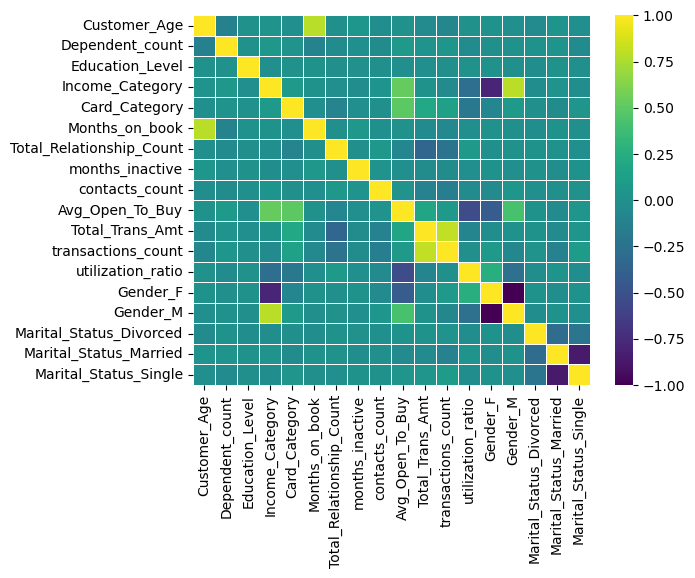

In [769]:
# Correlation Matrix

corr_matrix = final_X_train.corr()
sns.heatmap(corr_matrix, cmap='viridis', vmin=-1, vmax=1, linewidth=0.5)
plt.show()

In [770]:
list = df.select_dtypes(include=np.number).columns
list, len(list)

(Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
        'Total_Relationship_Count', 'months_inactive', 'contacts_count',
        'Avg_Open_To_Buy', 'Total_Trans_Amt', 'transactions_count',
        'utilization_ratio'],
       dtype='object'),
 10)

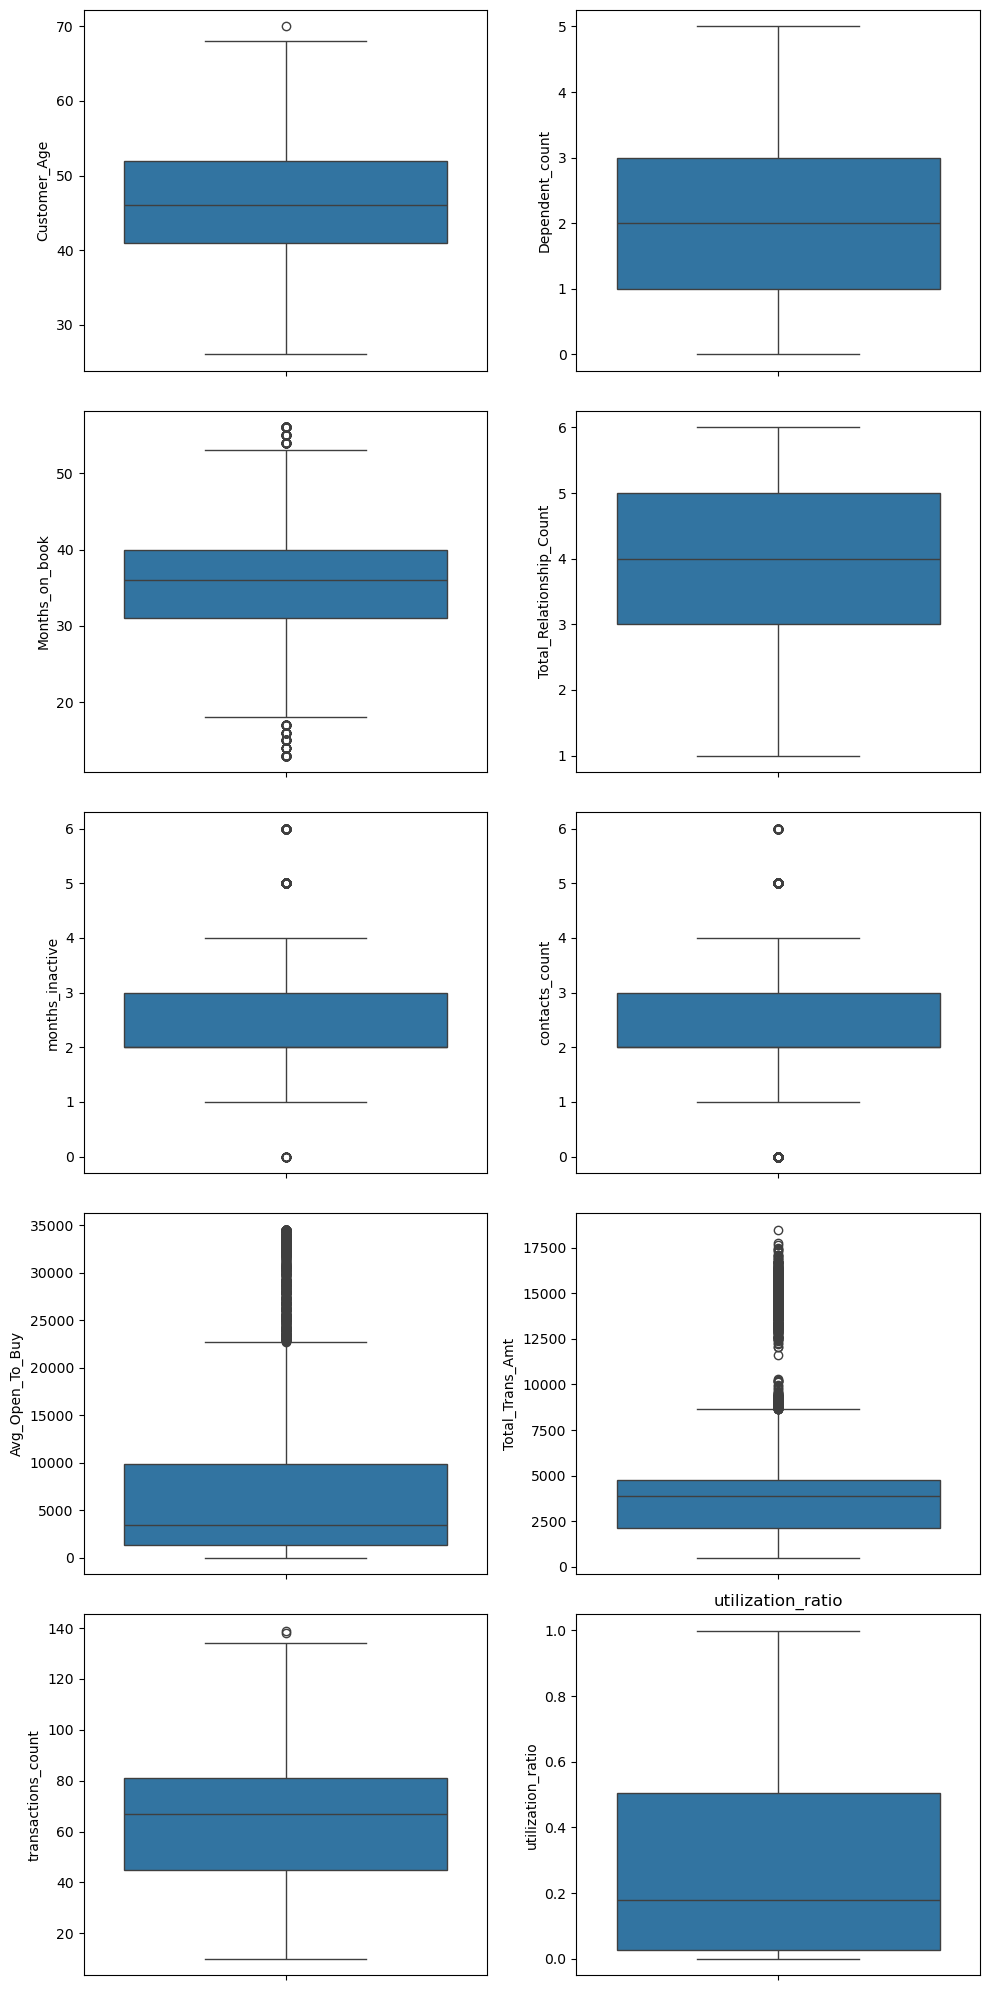

In [771]:
# Box plotting

fig, axes = plt.subplots(5, 2, figsize=(10, 20))
axes = axes.flatten()

for i, feature in enumerate(list):
    sns.boxplot(X_train[feature], ax=axes[i])
    plt.title(feature)
    
plt.tight_layout()
plt.show()

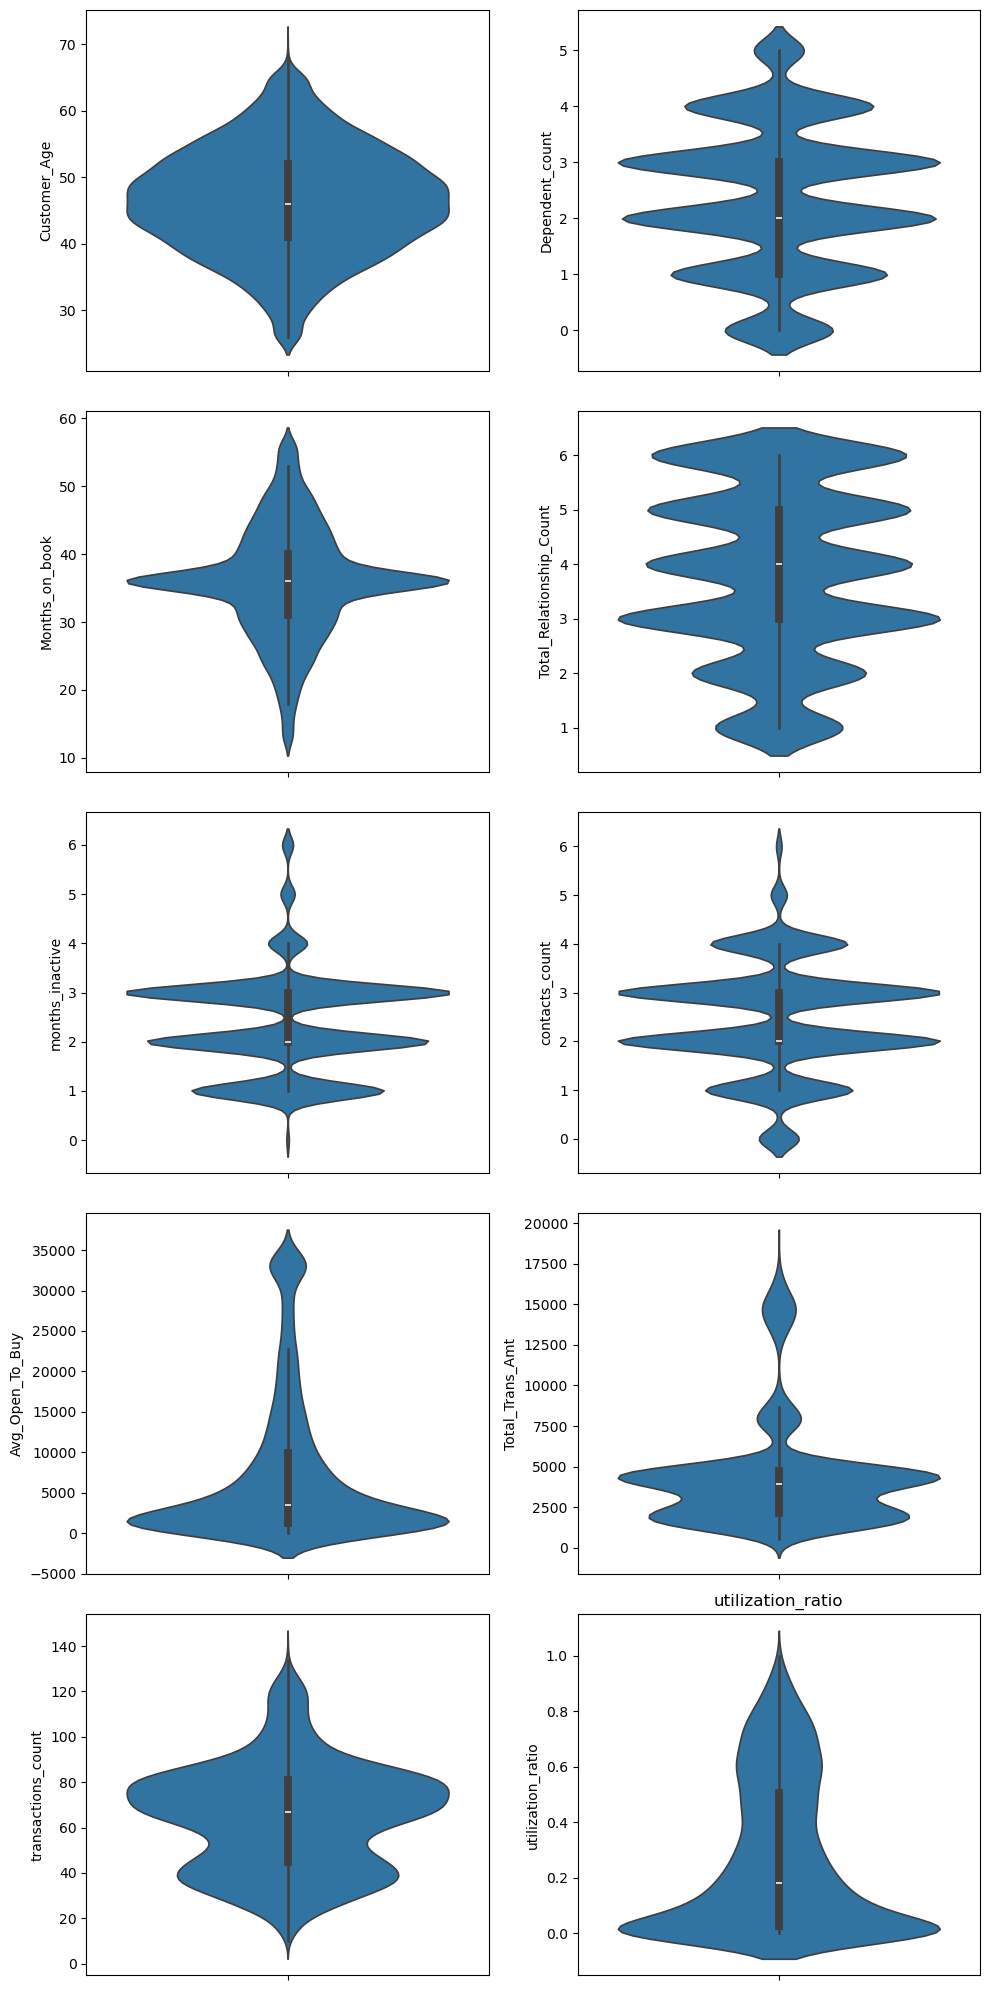

In [772]:
# Violin plotting

fig, axes = plt.subplots(5, 2, figsize=(10, 20))
axes = axes.flatten()

for i, feature in enumerate(list):
    sns.violinplot(X_train[feature], ax=axes[i])
    plt.title(feature)
    
plt.tight_layout()
plt.show()

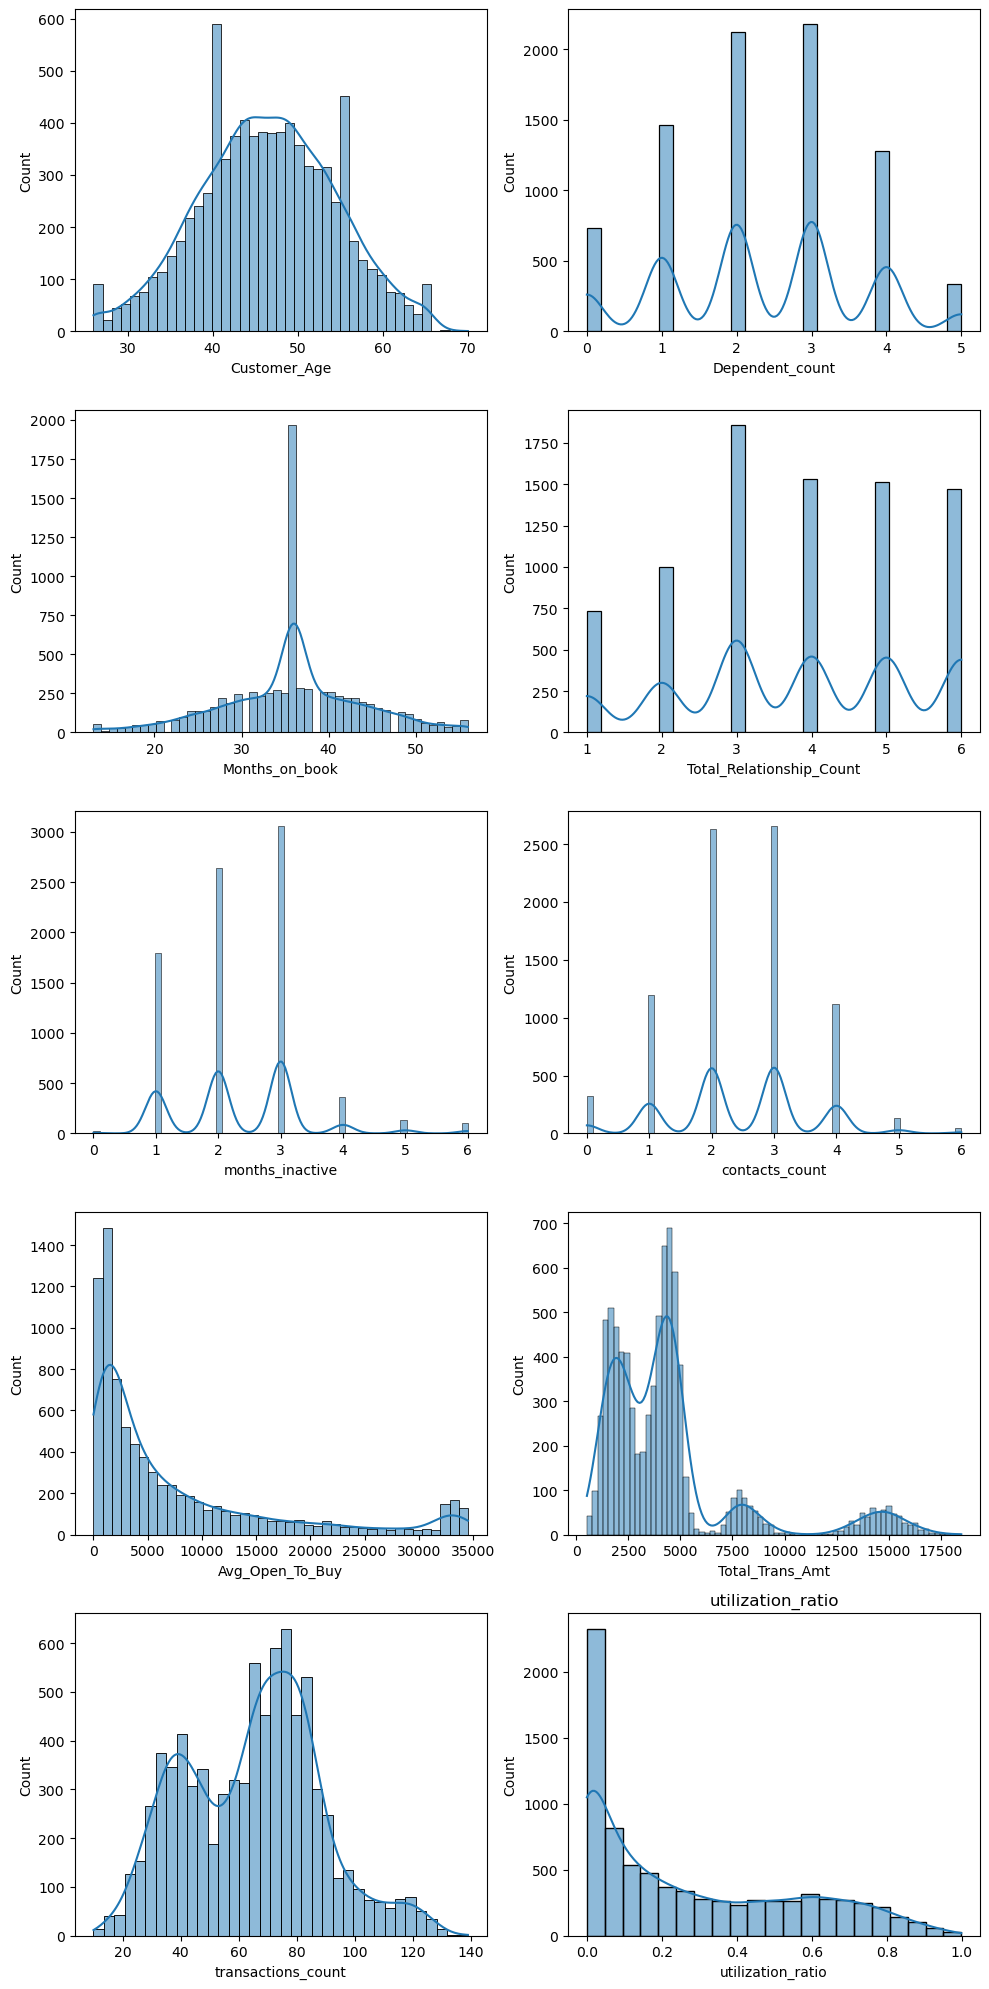

In [773]:
# Histogram plotting

fig, axes = plt.subplots(5, 2, figsize=(10, 20))
axes = axes.flatten()

for i, feature in enumerate(list):
    sns.histplot(X_train[feature], ax=axes[i], kde=True)
    plt.title(feature)
    
plt.tight_layout()
plt.show()

In [774]:
# Performing feature selection by lasso regularization

l1 = Lasso(alpha=0.01)
l1.fit(final_X_train, y_train)

for feature, coef in zip(final_X_train.columns, l1.coef_):
    print(f"{feature}: {coef}")

Customer_Age: 0.0
Dependent_count: -0.0023683707721594083
Education_Level: -0.000577380555715817
Income_Category: 0.010032516853775162
Card_Category: -0.0
Months_on_book: 0.0
Total_Relationship_Count: 0.07349874009054073
months_inactive: -0.03903774159813512
contacts_count: -0.046334941982058356
Avg_Open_To_Buy: 0.0
Total_Trans_Amt: -0.05168426338032276
transactions_count: 0.1747051802413079
utilization_ratio: 0.07163995865289623
Gender_F: -0.006485366317536722
Gender_M: 1.408670012903817e-17
Marital_Status_Divorced: -0.0
Marital_Status_Married: 0.0
Marital_Status_Single: -0.0


In [775]:
l1_series = pd.Series(l1.coef_, index=final_X_train.columns)
selected_features = l1_series[l1_series != 0].index
final_X_train = final_X_train[selected_features]
final_X_train.shape

(8101, 11)

In [776]:
# Preprocessing test data

X_test['Education_Level'].replace("Unknown", "Graduate", inplace=True)
X_test['Income_Category'].replace("Unknown", "Less than $40K", inplace=True)
X_test['Marital_Status'].replace("Unknown", "Married", inplace=True)

X_test[ordinal_features] = ordinal_enc.transform(X_test[ordinal_features])

encoded_features = hot_enc.transform(X_test[nominal_features])
encoded_df = pd.DataFrame(encoded_features, columns=hot_enc.get_feature_names_out(nominal_features))
X_test_encoded = pd.concat([X_test.drop(nominal_features, axis=1).reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

X_test_encoded[num_cols] = scaler.transform(X_test_encoded[num_cols])

final_X_test = X_test_encoded.copy()

y_test = pd.DataFrame(label_enc.transform(y_test))

final_X_test = final_X_test[selected_features]


In [792]:
# Grid Search with logistic Regression

lg = LogisticRegression()
params = {
    'C': [0.1, 1, 10]
}
grid = GridSearchCV(lg, param_grid=params, cv=5, verbose=1)
grid.fit(final_X_train, np.ravel(y_train))
print(grid.best_params_)
best_lg = grid.best_estimator_

lg_pred = best_lg.predict(final_X_test)
lg_accuracy = accuracy_score(y_test, lg_pred)
print(f"Logistic Regression: {lg_accuracy}")

Fitting 5 folds for each of 3 candidates, totalling 15 fits
{'C': 1}
Logistic Regression: 0.8775913129318855


In [793]:
# Grid Search with Decision Tree Classifier

tree = DecisionTreeClassifier()
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 9]
}
grid = GridSearchCV(tree, param_grid=params, cv=5, verbose=1)
grid.fit(final_X_train, y_train)
print(grid.best_params_)
best_tree = grid.best_estimator_

tree_pred = best_tree.predict(final_X_test)
tree_accuracy = accuracy_score(y_test, tree_pred)
print(f"Decision Tree Classifier: {tree_accuracy}")

Fitting 5 folds for each of 8 candidates, totalling 40 fits
{'criterion': 'entropy', 'max_depth': 7}
Decision Tree Classifier: 0.9348469891411648


In [804]:
# Grid Search with Random Forest Classifier

rf = RandomForestClassifier()
params = {
    'n_estimators': [50, 100, 150]
}
grid = GridSearchCV(rf, param_grid=params, cv=5, verbose=1)
grid.fit(final_X_train, np.ravel(y_train))
print(grid.best_params_)
best_rf = grid.best_estimator_

rf_pred = best_rf.predict(final_X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"Random Forest Classifier: {rf_accuracy}")

Fitting 5 folds for each of 3 candidates, totalling 15 fits
{'n_estimators': 50}
Random Forest Classifier: 0.941263573543929


In [795]:
# Grid Search with Support Vector Machine

svm = SVC()
params = {
    'C': [0.1, 1, 10]
}
grid = GridSearchCV(svm, param_grid=params, cv=5, verbose=1)
grid.fit(final_X_train, np.ravel(y_train))
print(grid.best_params_)
best_svm = grid.best_estimator_

svm_pred = best_svm.predict(final_X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
print(f"Support Vector Machine: {svm_accuracy}")

Fitting 5 folds for each of 3 candidates, totalling 15 fits
{'C': 10}
Support Vector Machine: 0.9076999012833169


In [796]:
# Grid Search with KNN

knn = KNeighborsClassifier()
params = {
    'n_neighbors': [3, 5, 7, 9, 11]
}
grid = GridSearchCV(knn, param_grid=params, cv=5, verbose=1)
grid.fit(final_X_train, np.ravel(y_train))
print(grid.best_params_)
best_knn = grid.best_estimator_

knn_pred = best_knn.predict(final_X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
print(f"KNN: {knn_accuracy}")

Fitting 5 folds for each of 5 candidates, totalling 25 fits
{'n_neighbors': 11}
KNN: 0.8810463968410661


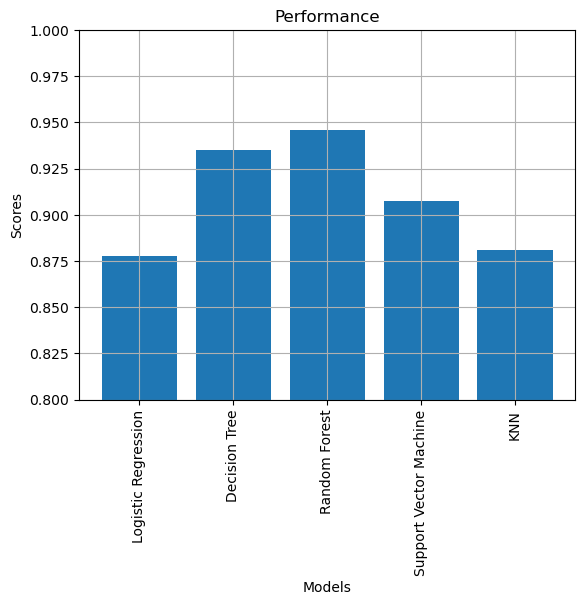

In [802]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Support Vector Machine', 'KNN']
scores = [lg_accuracy, tree_accuracy, rf_accuracy, svm_accuracy, knn_accuracy]
plt.bar(models, scores)
plt.xlabel("Models")
plt.ylabel("Scores")
plt.title("Performance")
plt.xticks(rotation=90)
plt.ylim(0.8, 1)
plt.grid()
plt.show()

In [815]:
importance = permutation_importance(best_rf, final_X_test, y_test)
imp = importance.importances_mean
imp_series = pd.Series(imp, index=final_X_test.columns)
imp_series = imp_series.sort_values(ascending=False)
colors = ['red' if value < 0 else 'blue' for value in imp_series.values]

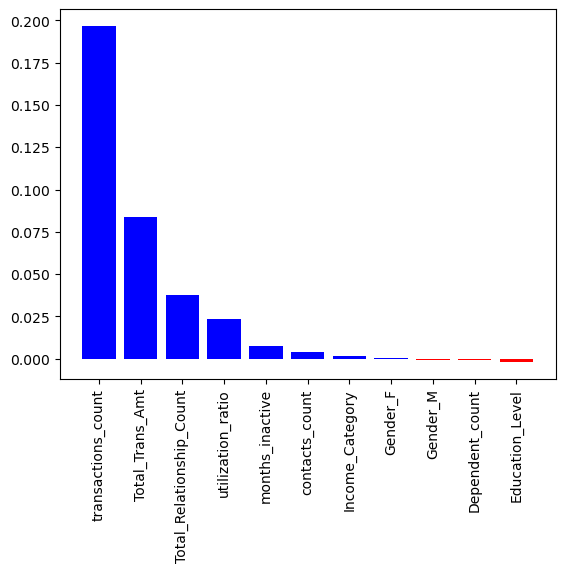

In [816]:
plt.bar(imp_series.index, imp_series.values, color=colors)
plt.xticks(rotation=90)
plt.show()